In [1]:
import pandas as pd
import numpy as np

In [2]:
df_train= pd.read_excel("Datos POC Biwares.xlsx",sheet_name="Dataset train").rename(columns = {"Tema":"label", "AUDIO_NOMBRE":"filename"})
df_test= pd.read_excel("Datos POC Biwares.xlsx",sheet_name="Test")

In [3]:
df_test = df_test[["text","final","llamada"]].rename(columns={"final":"label", "llamada":"filename"})

In [4]:
df = pd.concat([df_train, df_test]).reset_index().drop(columns="index")

In [5]:
df.filename.unique()

array(['_1_1_550920259 Select.wav', '_1_1_545318482 Select.wav',
       '_1_1_546091552 Select.wav', '_1_1_551057857 Select.wav',
       '_1_1_547087938 Select.wav', '_1_1_550892173 Select.wav',
       '_1_1_544621760 Select.wav', '_1_1_550738013 Select.wav',
       '_1_1_545726207 Select.wav', '_1_1_545728635 Select.wav',
       'Inventado', '_1_1_545031192 Select.wav',
       '_1_1_544518766 Select.wav', '_1_1_551008640 Select.wav',
       '_1_1_550661443 Masiva.wav', 'inventado',
       '_1_1_545047328 Select.wav', '_1_1_545323643 Select.wav',
       '_1_1_555703882 Masiva.wav', '_1_1_545184516 Select.wav',
       '_1_1_550949679 Select.wav', '_1_1_546467338 Select.wav',
       '_1_1_544972403 Select.wav', '_1_1_544608164 Select.wav',
       '_1_1_544847565 Masiva.wav', '_1_1_545192265 Select.wav',
       '_1_1_544702773 Select.wav', '_1_1_546102225 Select.wav',
       '_1_1_551012967 Masiva.wav', '_1_1_552549133 Masiva.wav',
       '_1_1_552451523 Masiva.wav', '_1_1_544378282 Selec

In [6]:
labels = list(df.label.unique())
labels.remove("CAJA DE SEGURIDAD")

In [7]:
df = df[df.label.isin(labels)]

In [8]:
y = np.array([labels.index(x) for x in df.label])

In [9]:
df.label.value_counts()

TARJETAS SANTANDER          251
CUENTAS SANTANDER            52
PRESTAMOS                    48
BENEFICIOS                   38
INVERSIONES                  38
SEGUROS                      37
EXTRACCIONES Y DEPOSITOS     36
OTROS                        36
TRANSFERENCIAS               35
FRAUDE                       20
TARJETAS SANTANDER1          17
TARJETAS SANTANDER2          15
TARJETAS SANTANDER3          14
CLAVES Y ACCESOS             14
Name: label, dtype: int64

In [10]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.model_selection import StratifiedKFold
import unidecode


In [11]:
with open("stop_words_spanish.txt", "rt") as f:
    a=f.readlines()

In [12]:
a = [w[:-1] for w in a]
a.extend(["quiero", "sé", "hola", "ya", "día", "buen", "tardes", "gracias", "problema", "te", "quería", "eh", "vos", "mí"])

In [13]:
TfidfVectorizer()

TfidfVectorizer()

In [14]:
from nltk import word_tokenize
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('spanish')

In [18]:
texts = df["text"].values

In [19]:
texts = [word_tokenize(s) for s in texts]

In [17]:
texts =[[stemmer.stem(w) for w in s] for s in texts]

In [20]:
texts =[[w for w in s if w.isalpha()] for s in texts]

In [21]:
texts = [" ".join(s) for s in texts]

In [22]:
vec = CountVectorizer(min_df = 1, stop_words= a) 
X = vec.fit_transform(texts)

In [23]:
import gensim
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.datasets import make_multilabel_classification


In [24]:
#lda = LatentDirichletAllocation(n_components=10,
#    random_state=0)
#lda.fit(X)

# get topics for some given samples:
#lda.transform(X[-2:])

lda = NMF(n_components=10,
     random_state=0)
lda.fit(X)

# # get topics for some given samples:
lda.transform(X[-2:])

/home/cselmo/.conda/envs/media_downloaders/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


array([[0.14531683, 0.00260055, 0.03338475, 0.02079582, 0.08444695,
        0.05183532, 0.06971758, 0.        , 0.05198394, 0.2121045 ],
       [0.12846563, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.25031938, 0.69463586]])

In [25]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

In [26]:
from matplotlib import pyplot as plt

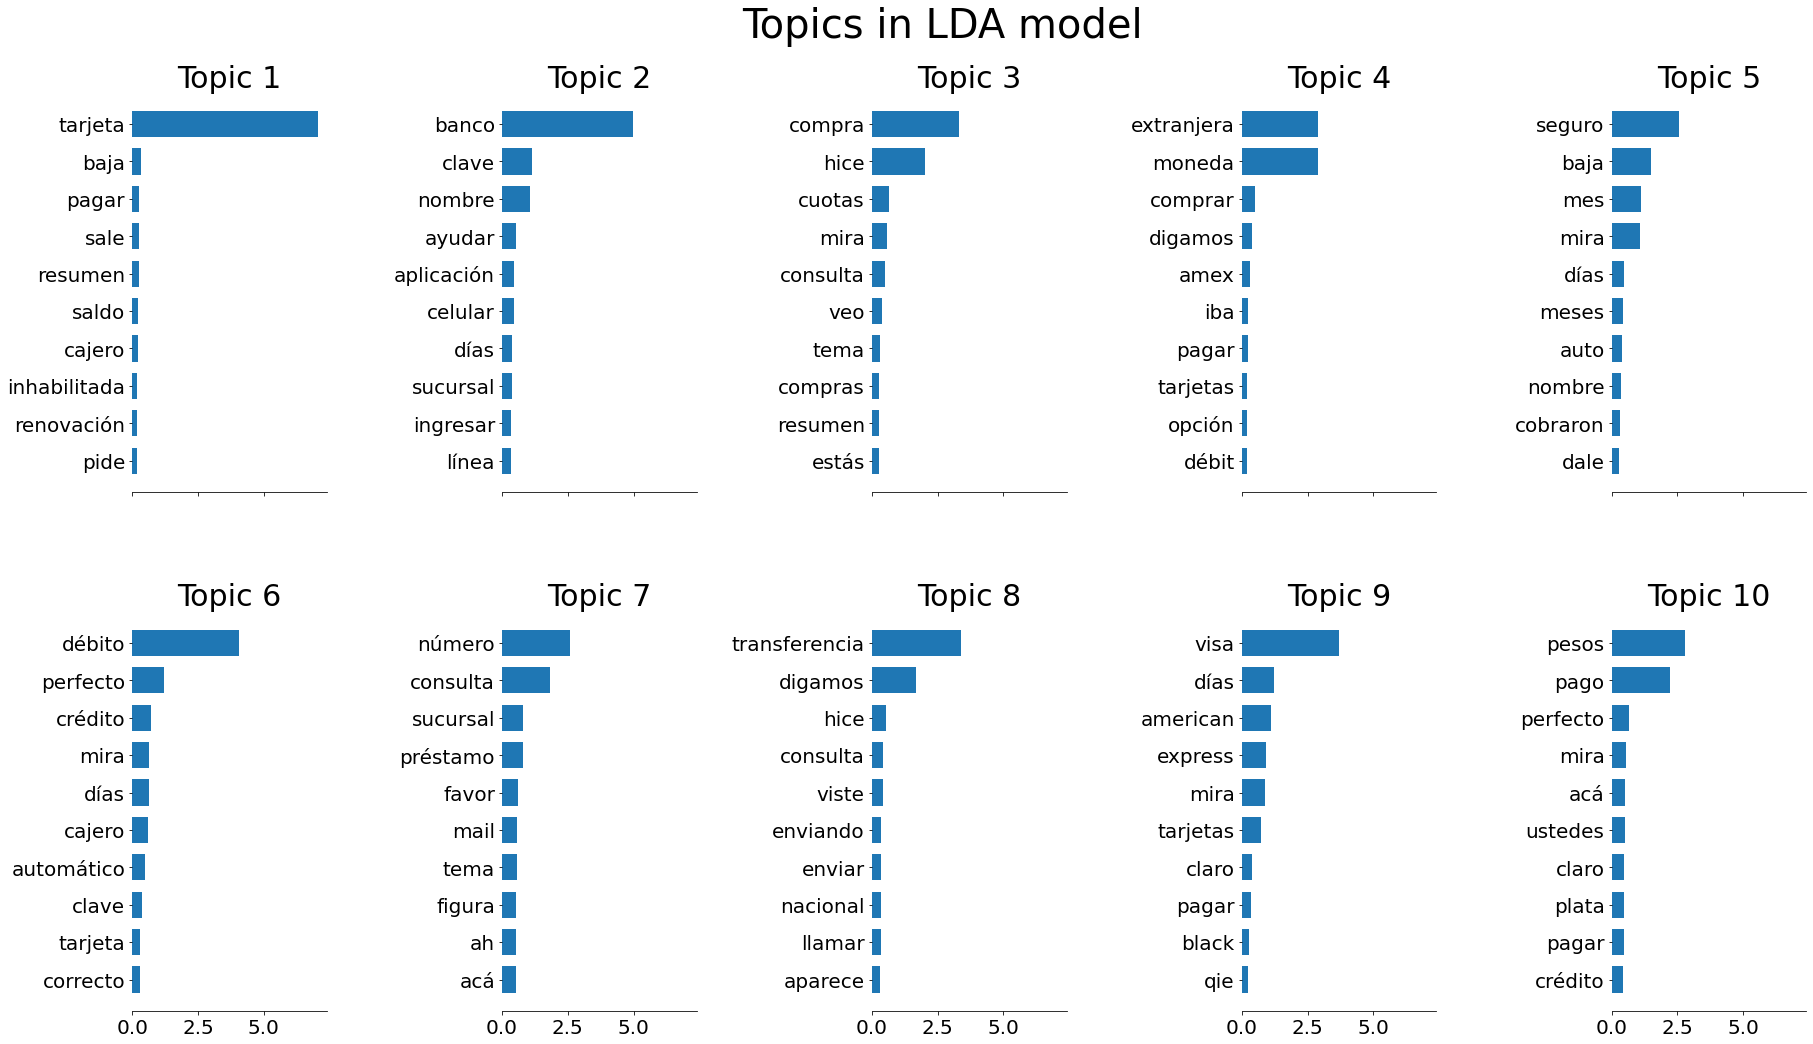

In [27]:
plot_top_words(lda, vec.get_feature_names_out(), 10, "Topics in LDA model")

In [40]:
texts[3]

'o sea yo por ejemplo qué podría decir serían bonos por ejemplo no podría comprar bonos'

In [38]:
lda.transform(X[0:2])

array([[0.        , 0.        , 0.00767801, 0.00141903, 0.00162257,
        0.00095596, 0.        , 0.        , 0.00265391, 0.00087812],
       [0.14507508, 0.        , 0.        , 0.        , 0.01042177,
        0.        , 0.        , 0.        , 0.00055741, 0.        ]])

In [85]:
df.iloc[3].text, df.iloc[3].label

('¿ah, o sea yo, por ejemplo, qué podría decir? serían bonos, por ejemplo, no podría comprar bonos.',
 'BENEFICIOS')

In [585]:
for label_idx in range(len(labels)):
    print(labels[label_idx])
    for idx in clf.coef_[label_idx].argsort()[:-10:-1]:
        print(vec.get_feature_names_out()[idx])
    print()

BENEFICIOS
bonificación
canje
puntos
descuento
llamarme
ponerla
promoción
comisión
serían

CUENTAS SANTANDER
cuenta
corriente
recuerda
genial
trabajar
gas
acreditación
cerrar
aclara

EXTRACCIONES Y DEPOSITOS
cajero
extracción
dinero
depositar
dada
santander
extraer
depósito
ticket

FRAUDE
estafa
robaron
conocer
fraude
facilitar
suspender
legales
veraz
trucha

INVERSIONES
comprar
resto
documentación
plazo
común
invertir
negatividad
unificarlo
comprado

OTROS
hablo
jubilación
facturación
acercó
violeta
vemos
oigo
usuario
obtener

PRESTAMOS
préstamo
cancelar
cancelación
tasa
crédito
asegurar
cámara
simulador
herminia

SEGUROS
seguro
seguros
siniestro
zurich
meridional
cotizaicón
incendio
contratado
rotura

TARJETAS SANTANDER1
cerca
almorzado
referido
ios
anoche
crédito
solicite
filete
ramírez

TARJETAS SANTANDER2
siendo
funcionaba
oland
habilita
justa
presencial
spotify
aumentar
contamine

TRANSFERENCIAS
transferencia
asociar
transferí
transferirme
realizaron
transferencias
lorena
electró

In [428]:
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(X, y)

for idx in range(5,6):
    scores = []
      
    
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]    
        clf = MultinomialNB()
        clf.fit(X_train,y_train)
        scores.append(clf.score(X_test,y_test))
    print(np.mean(scores))

0.6526806526806527


/home/cselmo/.conda/envs/media_downloaders/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['por'] not in stop_words.
  warnings.warn(


In [413]:
for label_idx in range(len(labels)):
    print(labels[label_idx])
    for idx in clf.coef_[label_idx].argsort()[:-10:-1]:
        print(vec.get_feature_names()[idx])
    print()

BENEFICIOS
sé
hice
día
tarjeta
bonificación
mes
mira
puntos
canje

CUENTAS SANTANDER
te
quería
tarjeta
mira
tardes
ya
banco
sé
eh

EXTRACCIONES Y DEPOSITOS
cajero
tarjeta
dinero
hola
hice
pesos
te
banco
débito

FRAUDE
tarjeta
número
hola
quiero
estafa
robaron
día
consulta
pesos

INVERSIONES
extranjera
moneda
te
eh
comprar
día
días
quería
compra

OTROS
hola
te
banco
nombre
tardes
eh
gracias
número
página

PRESTAMOS
préstamo
crédito
quería
consulta
gracias
te
quiero
cuota
ya

SEGUROS
seguro
baja
quería
mira
hola
quiero
ya
te
tardes

TARJETAS SANTANDER1
tarjeta
hola
días
débito
compra
crédito
hice
día
mira

TARJETAS SANTANDER2
compra
tarjeta
mira
seguro
límite
hola
días
resulta
problema

TRANSFERENCIAS
transferencia
día
te
pago
banco
quería
eh
digamos
persona

TARJETAS SANTANDER3
hola
tarjeta
sé
baja
banco
días
extranjera
nombre
moneda

CLAVES Y ACCESOS
clave
banco
transferencia
tarjeta
te
token
gracias
consulta
días

TARJETAS SANTANDER
tarjeta
te
hola
visa
mira
ya
débito
día
sé



/home/cselmo/.conda/envs/media_downloaders/lib/python3.8/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
/home/cselmo/.conda/envs/media_downloaders/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [441]:
from sklearn.preprocessing import StandardScaler

In [445]:
norm = StandardScaler(with_mean=False)

In [494]:
idx

51

In [572]:
from sklearn.linear_model import LogisticRegression
vec = CountVectorizer(min_df = 1, stop_words= a)   
X = vec.fit_transform(texts)
X_norm = norm.fit_transform(X)
scores = list()
predicts = list()
indexes = list()
for train_index, test_index in skf.split(X, y):
        X_train, X_test = X_norm[train_index], X_norm[test_index]
        y_train, y_test = y[train_index], y[test_index]    
        clf = LogisticRegression(penalty = "l1", C=0.1, max_iter = 10000, multi_class = "multinomial", solver = "saga")
        clf.fit(X_train,y_train )
        scores.append(clf.score(X_test,y_test))
        predicts.append(clf.predict(X_test))
        indexes.append(test_index)

/home/cselmo/.conda/envs/media_downloaders/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['por'] not in stop_words.
  warnings.warn(


In [573]:
X_norm

<651x3664 sparse matrix of type '<class 'numpy.float64'>'
	with 26189 stored elements in Compressed Sparse Row format>

In [574]:
idxs = np.concatenate(indexes)

In [575]:
preds = np.concatenate(predicts)

In [576]:
preds = [labels[p] for p in preds]

In [577]:
df["pred"] = ""

In [578]:
df.iloc[idxs,3] = preds

In [592]:
df.query("label != pred")

,text,label,filename,pred
1,quedaron en llamarme porque para ver si me hac...,BENEFICIOS,_1_1_545318482 Select.wav,TARJETAS SANTANDER
2,estuve con con una representante de la sucursa...,BENEFICIOS,_1_1_546091552 Select.wav,TARJETAS SANTANDER
3,"¿ah, o sea yo, por ejemplo, qué podría decir? ...",BENEFICIOS,_1_1_551057857 Select.wav,INVERSIONES
4,"¿hola, buenas tardes, cómo estás? mira, no sé ...",BENEFICIOS,_1_1_547087938 Select.wav,CUENTAS SANTANDER
6,"mira, quiero acá tengo unos gastos en la tarje...",BENEFICIOS,_1_1_544621760 Select.wav,TARJETAS SANTANDER
...,...,...,...,...
623,"hola, buenas tardes. que quería dar una cuota ...",TARJETAS SANTANDER,_1_1_556567509 Select.wav,PRESTAMOS
626,"hola, hola, no entiendo, no escucho nada. hola...",OTROS,_1_1_556868781 Select.wav,TARJETAS SANTANDER
636,muy buenas tardes. jimena danette mi nombre es...,OTROS,_1_1_557046866 Masiva.wav,TARJETAS SANTANDER
644,"mhm. ahora sí, buenas tardes. mira la realidad...",PRESTAMOS,_1_1_557479826 Select.wav,TARJETAS SANTANDER


In [583]:
print(scores)
np.mean(scores)

[0.6515151515151515, 0.676923076923077, 0.7692307692307693, 0.7076923076923077, 0.6461538461538462, 0.5692307692307692, 0.47692307692307695, 0.6153846153846154, 0.6923076923076923, 0.6307692307692307]


0.6436130536130538

In [584]:
df.text[1]

'quedaron en llamarme porque para ver si me hacían un beneficio de la renovación de la tarjeta esa no me la iban a cobrar'

In [585]:
for label_idx in range(len(labels)):
    print(labels[label_idx])
    for idx in clf.coef_[label_idx].argsort()[:-10:-1]:
        print(vec.get_feature_names_out()[idx])
    print()

BENEFICIOS
bonificación
canje
puntos
descuento
llamarme
ponerla
promoción
comisión
serían

CUENTAS SANTANDER
cuenta
corriente
recuerda
genial
trabajar
gas
acreditación
cerrar
aclara

EXTRACCIONES Y DEPOSITOS
cajero
extracción
dinero
depositar
dada
santander
extraer
depósito
ticket

FRAUDE
estafa
robaron
conocer
fraude
facilitar
suspender
legales
veraz
trucha

INVERSIONES
comprar
resto
documentación
plazo
común
invertir
negatividad
unificarlo
comprado

OTROS
hablo
jubilación
facturación
acercó
violeta
vemos
oigo
usuario
obtener

PRESTAMOS
préstamo
cancelar
cancelación
tasa
crédito
asegurar
cámara
simulador
herminia

SEGUROS
seguro
seguros
siniestro
zurich
meridional
cotizaicón
incendio
contratado
rotura

TARJETAS SANTANDER1
cerca
almorzado
referido
ios
anoche
crédito
solicite
filete
ramírez

TARJETAS SANTANDER2
siendo
funcionaba
oland
habilita
justa
presencial
spotify
aumentar
contamine

TRANSFERENCIAS
transferencia
asociar
transferí
transferirme
realizaron
transferencias
lorena
electró

['hola buendía quiero usar los puntos de superclub me ayuda',
 'quedaron en llamarme porque para ver si me hacían un beneficio de la renovación de la tarjeta esa no me la iban a cobrar',
 'estuve con con una representante de la sucursal donde yo tengo una caja de ahorro acá en la localidad de funes santa fe eh porque bueno yo tenía siempre una caja de ahorro de hace muchos años',
 'o sea yo por ejemplo qué podría decir serían bonos por ejemplo no podría comprar bonos',
 'buenas tardes cómo estás mira no sé por qué el tercer llamado que estoy haciendo y me están diciendo que marque distintas opciones y ahora me dijeron que tengo que apretar este plazo fijo te explico cuál es mi motivo a mí me tienen una bonificación porque tengo un plazo fijo y no me cobran el cuenta corriente si el mantenimiento en octubre se vence y me dijeron que tengo que llamar para renovarlo para que no me descuenten el mantenimiento de la cuenta estaba una consulta porque es la tercera vez que estoy llamando que 